# Análise de dados sobre o Dataset de Vendas de Café numa Maquina de vendas

## Overview
- Este conjunto de dados contém registros detalhados de vendas de café em uma máquina de venda automática. A máquina de venda automática é o trabalho de um autor de conjunto de dados que está comprometido em fornecer um conjunto de dados aberto para a comunidade. 
- Ele se destina à análise de padrões de compra, tendências de vendas e preferências do cliente relacionadas a produtos de café.

## Período de coleta de dados
- O conjunto de dados abrange de março de 2024 até fevereiro de 2025, capturando dados de transações diárias. 

## Tarefas
- Análise exploratória de dados de séries temporais
- Vendas do próximo dia/semana/mês
- Compras específicas do cliente

## Autor do Dataset
- Yaroslav Isaienkov @ihelon

In [2]:
#Importando Bibliotecas Iniciais
import pandas as pd
import numpy as np

#carregando o dataset para o projeto
base = pd.read_csv('./index_1.csv')
base.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3263 non-null   object 
 1   datetime     3263 non-null   object 
 2   cash_type    3263 non-null   object 
 3   card         3174 non-null   object 
 4   money        3263 non-null   float64
 5   coffee_name  3263 non-null   object 
dtypes: float64(1), object(5)
memory usage: 153.1+ KB


In [4]:
#Após analise da base de dados, percebe-se que, onde os valores em CARD são nulos, é porque o pagamento foi feito
#em dinheiro. Por isso, não se pode deletar as colunas que são nulas pois afetarão possíveis análises. Irei
#substituir o valor de NULL por CASH
base.loc[base['card'].isnull(), 'card'] = 'cash'
base.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
#Encontramos 89 dados nulos e, 
#verificamos que essa quantidade de dados não afetará a análise, por isso eles foram retirados da tabela
base.describe()

,money
count,3263.000000
mean,31.798682
std,4.939635
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [6]:
base.head(15)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [7]:
#importando mais bibliotecas para fornecer analises vistas em gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Tendências temporais de vendas

- Agrupando os dados por 'date' para identificar padrões diários, semanais e mensais.
- Verificando se há sazonalidade nas vendas (exemplo: mais vendas em determinados dias da semana ou horários específicos).

In [8]:
#Transformando a coluna 'datetime' (object) em datetime
base['datetime'] = pd.to_datetime(base['datetime'])

# Criar uma coluna de dia da semana e mês
base['day_of_week'] = base['datetime'].dt.day_name()
base['month'] = base['datetime'].dt.month_name()
base['year'] = base['datetime'].dt.year
base['year_month'] = base['datetime'].dt.to_period('M')
base['hour'] = base['datetime'].dt.hour
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3263 non-null   object        
 1   datetime     3263 non-null   datetime64[ns]
 2   cash_type    3263 non-null   object        
 3   card         3263 non-null   object        
 4   money        3263 non-null   float64       
 5   coffee_name  3263 non-null   object        
 6   day_of_week  3263 non-null   object        
 7   month        3263 non-null   object        
 8   year         3263 non-null   int64         
 9   year_month   3263 non-null   period[M]     
 10  hour         3263 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6), period[M](1)
memory usage: 280.5+ KB


## 📊 1. Análise de vendas por dia

<class 'pandas.core.series.Series'>
Index: 355 entries, 2024-03-01 to 2025-02-25
Series name: None
Non-Null Count  Dtype
--------------  -----
355 non-null    int64
dtypes: int64(1)
memory usage: 5.5+ KB


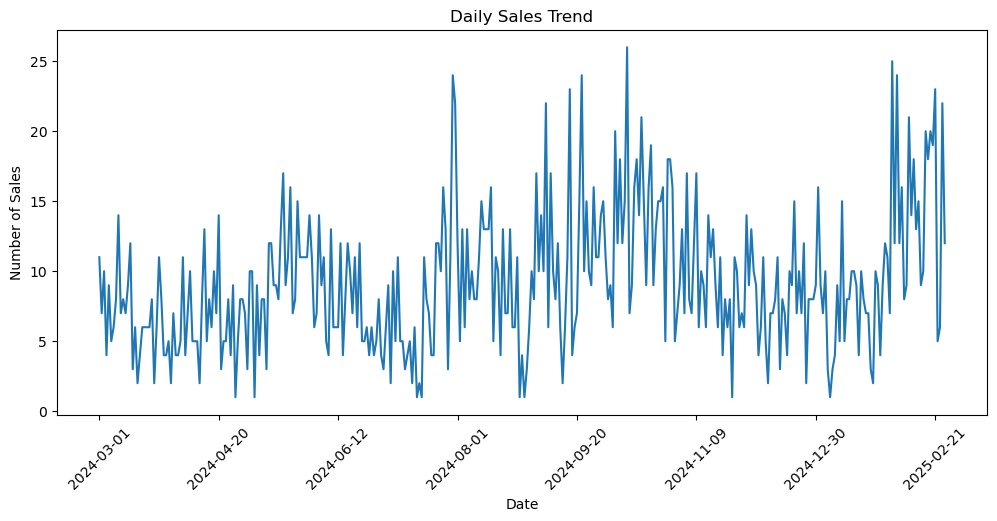

In [9]:
base_diaria = base.groupby('date').size()
base_diaria.info()

plt.figure(figsize=(12,5))
base_diaria.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()


## 📊 2. Análise de vendas por dia da semana

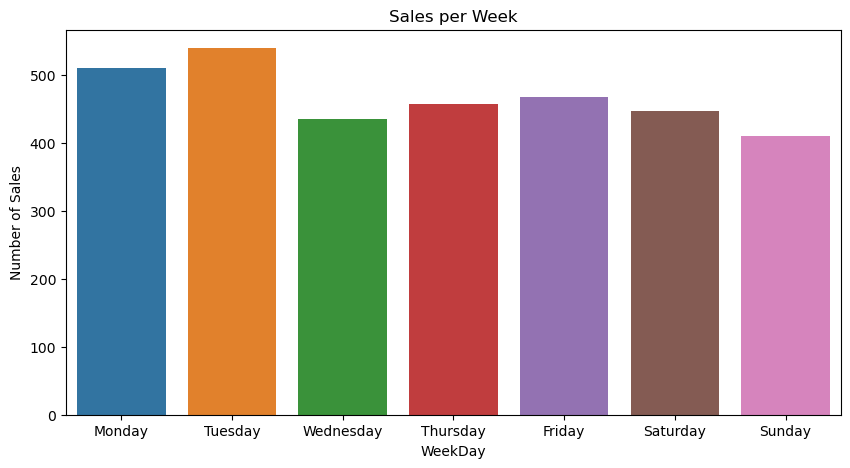

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=base, x="day_of_week", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Sales per Week")
plt.xlabel("WeekDay")
plt.ylabel("Number of Sales")
plt.show()

## 📊 3. Análise de vendas por mês

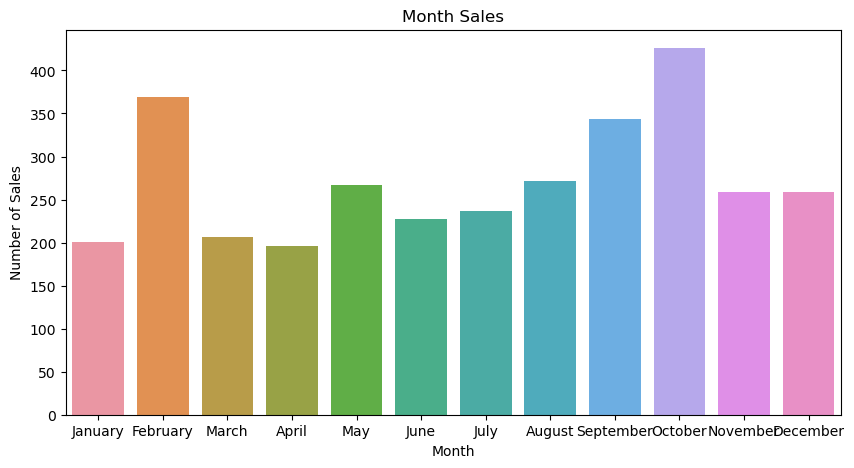

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=base, x="month", order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title("Month Sales")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.show()

## 4. Análise de horario com maiores vendas por dia

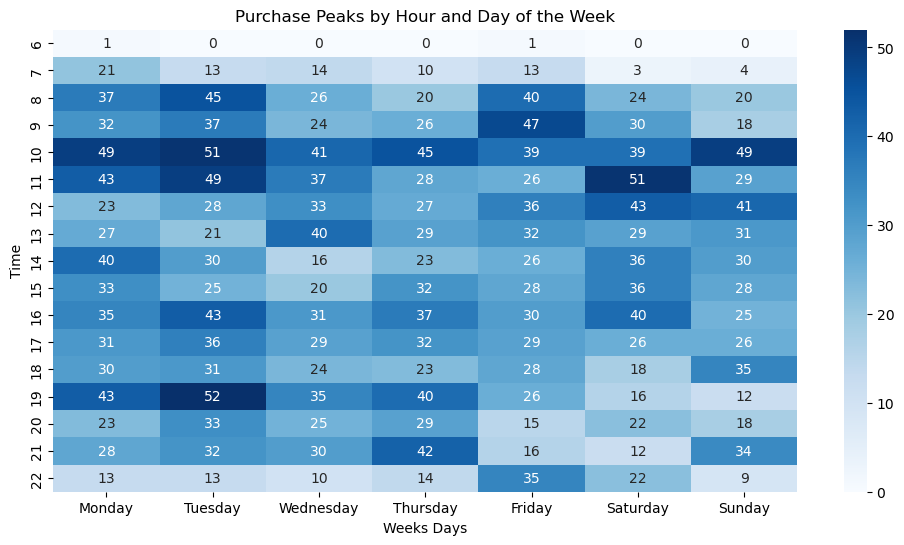

In [12]:
plt.figure(figsize=(12,6))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Criar a tabela dinâmica (garantindo a ordenação correta dos dias da semana)
pivot_table = base.pivot_table(index="hour", columns="day_of_week", aggfunc="size", fill_value=0)
pivot_table = pivot_table[order_days]  # Reorganiza as colunas na ordem correta

sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt="d")
plt.title("Purchase Peaks by Hour and Day of the Week")
plt.xlabel("Weeks Days")
plt.ylabel("Time")
plt.show()

# Método de pagamento preferido
- Comparando tipo de pagamento para identificar a forma de pagamento mais usada.

In [13]:
base['cash_type'].value_counts()

card    3174
cash      89
Name: cash_type, dtype: int64

In [14]:
base['payment_method'] = base['cash_type'].fillna("Card")
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3263 non-null   object        
 1   datetime        3263 non-null   datetime64[ns]
 2   cash_type       3263 non-null   object        
 3   card            3263 non-null   object        
 4   money           3263 non-null   float64       
 5   coffee_name     3263 non-null   object        
 6   day_of_week     3263 non-null   object        
 7   month           3263 non-null   object        
 8   year            3263 non-null   int64         
 9   year_month      3263 non-null   period[M]     
 10  hour            3263 non-null   int64         
 11  payment_method  3263 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7), period[M](1)
memory usage: 306.0+ KB


## 📊 1. Comparação da quantidade de vendas por método de pagamento

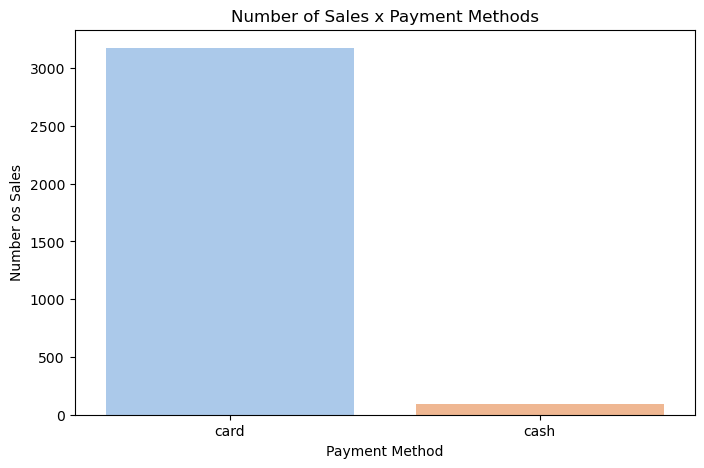

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=base, x="payment_method", palette="pastel")
plt.title("Number of Sales x Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number os Sales")
plt.show()

## 📊 2. Análise da variação dos métodos de pagamento ao longo do tempo

<Figure size 2400x1200 with 0 Axes>

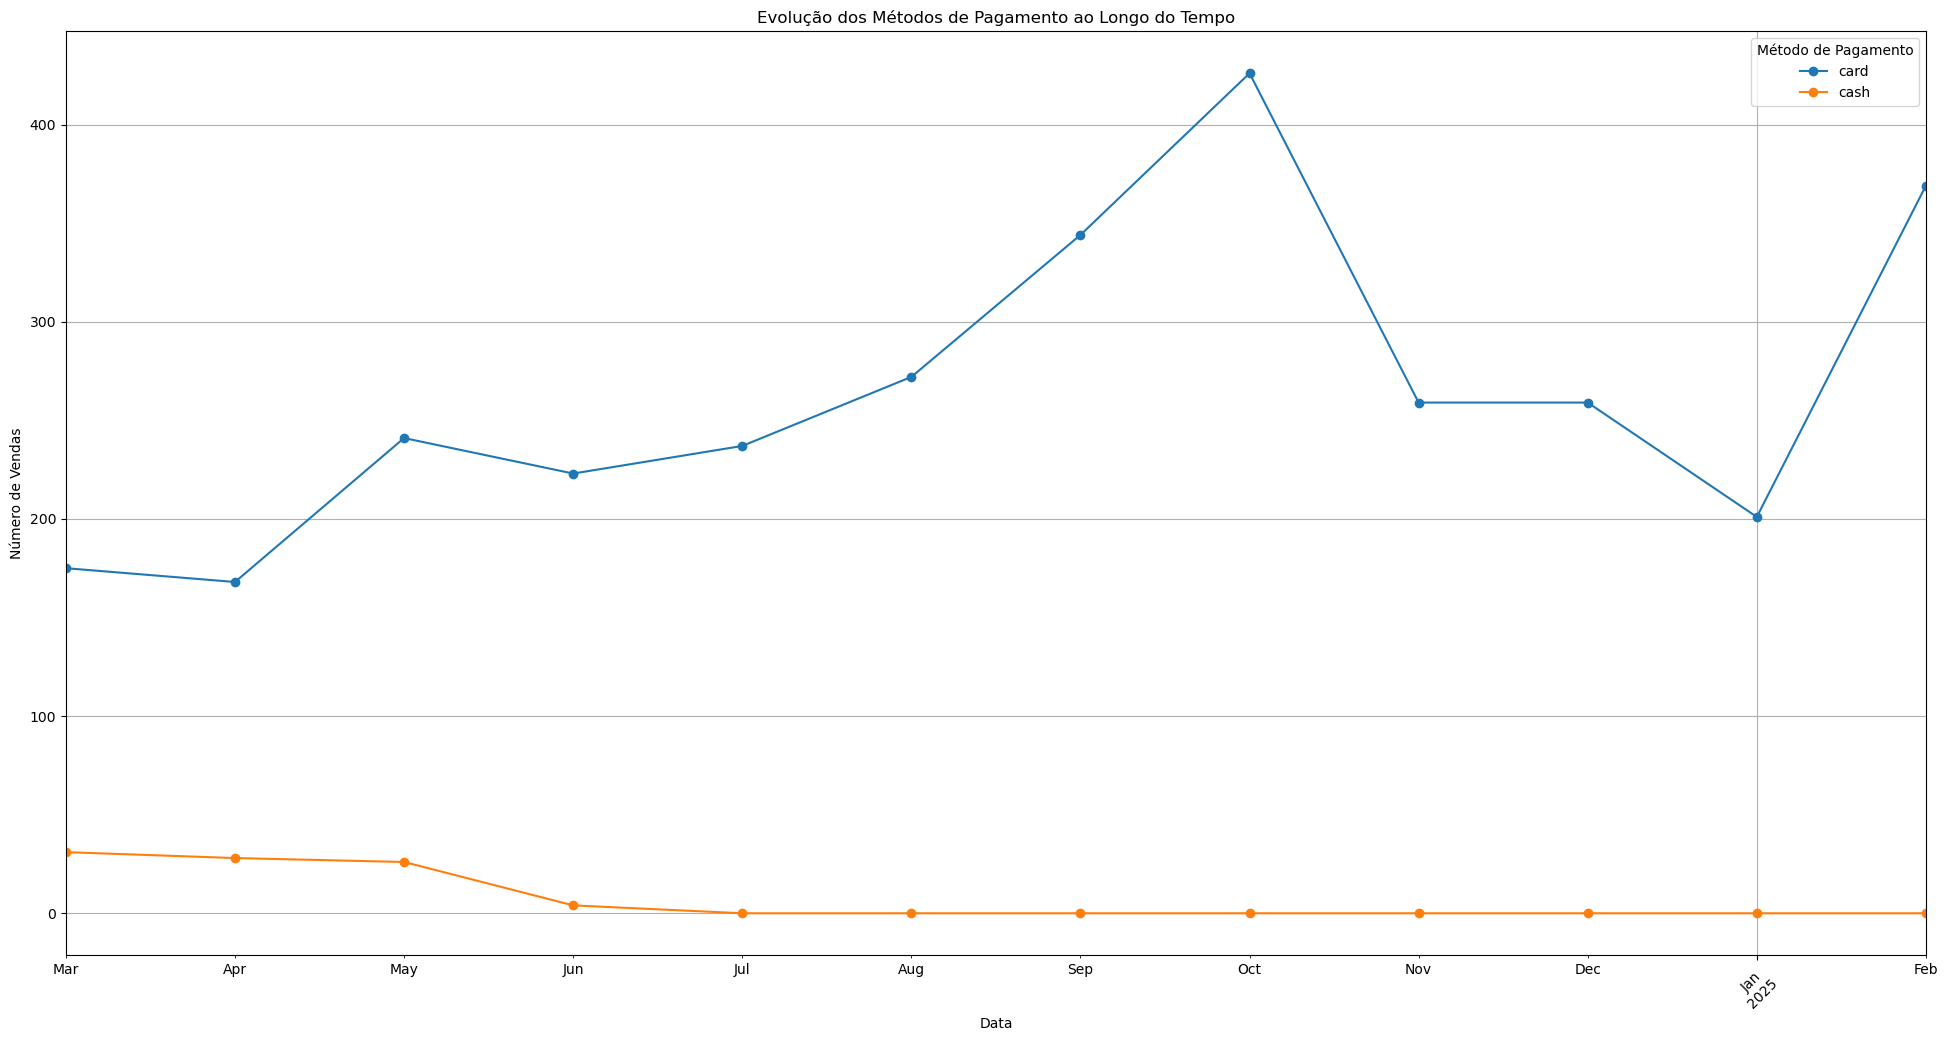

In [16]:
# Agrupar e contar as vendas por dia e método de pagamento
df_trend = base.groupby(['year_month', 'payment_method']).size().unstack(fill_value=0)

# Criar o gráfico de tendência ao longo do tempo
plt.figure(figsize=(24,12))
df_trend.plot(kind="line", marker="o", figsize=(24,12))
        
plt.title("Evolução dos Métodos de Pagamento ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Número de Vendas")
plt.legend(title="Método de Pagamento")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Popularidade dos tipos de café


## 📊 1. Contar a quantidade total de vendas por tipo de café


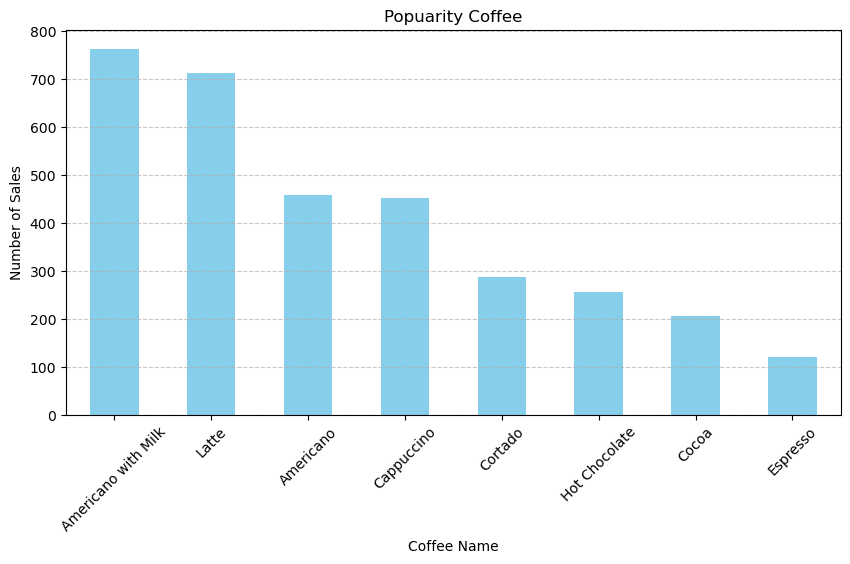

In [18]:
coffee_counts = base['coffee_name'].value_counts()

# Criar um gráfico de barras para mostrar os cafés mais vendidos
plt.figure(figsize=(10,5))
coffee_counts.plot(kind='bar', color='skyblue')
plt.title("Popuarity Coffee")
plt.xlabel("Coffee Name")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 📊 2. Analisar a variação da popularidade ao longo do tempo

<Figure size 1200x600 with 0 Axes>

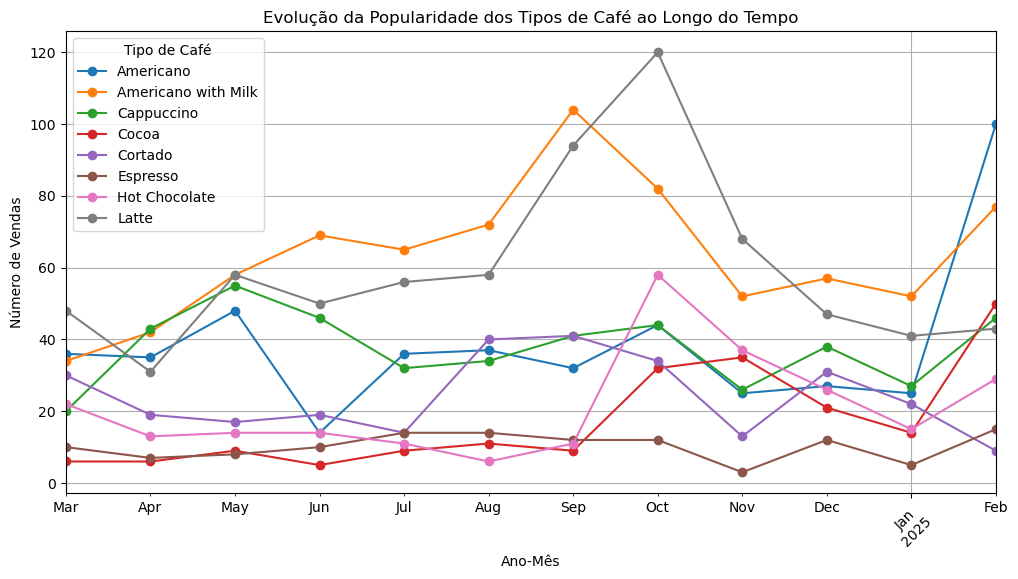

In [20]:
df_coffee_trend = base.groupby(['year_month', 'coffee_name']).size().unstack(fill_value=0)

# Criar o gráfico de linha para ver a popularidade ao longo do tempo
plt.figure(figsize=(12,6))
df_coffee_trend.plot(kind='line', marker="o", figsize=(12,6))

plt.title("Evolução da Popularidade dos Tipos de Café ao Longo do Tempo")
plt.xlabel("Ano-Mês")
plt.ylabel("Número de Vendas")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Tipo de Café")
plt.show()